## 1. Choose Simulated generation parameters and source

In [1]:
import sys
import os
import pickle
import networkx as nx
import numpy as np
# paths/directories
sim_dir = "simulators"
out_dir = "datasets"

runs = 3
NumTimesteps = 500

'''
Data Simulator Descriptions
InteractomeOriginalCode: Originally released Neural Interactome code.
    uses outdated connections, N = 279, presumed to have some math errors, often exhibits oscillatory behavior
InteractomeOldConnections: Rewritten Neural Interactome code.
    uses outdated connections, N = 279, math errors presumably corrected, seems less oscillatory behavior.
    gives extra targets (synaptic value)
InteractomeNewConnections:
    uses outdated connections, N = 302, math errors presumably corrected, seems less oscillatory behavior.
    gives extra targets (synaptic value)
'''
#RELOAD MODULES WHEN CHANGING THIS
simulator_name = 'InteractomeOriginalCode'
#simulator_name = 'InteractomeOldConnections'

sim_dir = os.path.join(sim_dir, simulator_name)
out_dir = os.path.join(out_dir, simulator_name)
sys.path.append(sim_dir)
from simulator import GenerateRecordings

'''
Initialization Descriptions

'''
#initialization =
PercentPerturbed = 0.1
AmountPerturbed = 0.5


## 2. Run chosen simulator for run times and save data to folder

In [2]:
for i in range(runs):

    saved_dynamics_array, statics = GenerateRecordings(NumTimesteps, PercentPerturbed, AmountPerturbed, sim_dir)

    #make folder if doesn't exist
    run_folder = os.path.join(out_dir, 'run' + str(i))
    os.makedirs(run_folder, exist_ok=True)

    #make variables and save
    
    #targets: dimension TxN
    targets = saved_dynamics_array.voltages
    pickle.dump( targets, open( os.path.join(run_folder,"targets.p"), "wb" ) )
    
    #targets2 (corrected code only): dimension TxN
    if saved_dynamics_array.targets2 != None :
        targets2 = saved_dynamics_array.targets2
        #pickle.dump( targets2, open( os.path.join(run_folder,"targets2.p"), "wb" ) )

    #gap_conn: dimension 1x(edge tuples)
    gap_conn = [(p[0],p[1]) for p in statics.elec_graph.edges.data()]
    pickle.dump( gap_conn, open( os.path.join(run_folder,"gap_conn.p"), "wb" ) )
    #gap_weights: dimension 1x(# of edges)
    gap_weights = [p[2].get("weight") for p in statics.elec_graph.edges.data()]
    pickle.dump( gap_weights, open( os.path.join(run_folder,"gap_weights.p"), "wb" ) )
    
    #syn_conn: dimension 1x(edge tuples)
    syn_conn = [(p[0],p[1]) for p in statics.chem_graph.edges.data()]
    pickle.dump( syn_conn, open( os.path.join(run_folder,"syn_conn.p"), "wb" ) )
    #syn_weights: dimension 1x(# of edges)
    syn_weights = [p[2].get("weight") for p in statics.chem_graph.edges.data()]
    pickle.dump( syn_weights, open( os.path.join(run_folder,"syn_weights.p"), "wb" ) )
    
    #features: dimension Nx(static parameters, cell type, neuron name, etc)
    assert len(statics.names) == len(statics.directionality_E)
    features = list(zip(statics.names, [p[0] for p in statics.directionality_E]))
    pickle.dump( features, open( os.path.join(run_folder,"features.p"), "wb" ) )

    


Chosen Neurons[132, 190, 80, 196, 266, 277, 251, 105, 44, 229, 64, 54, 160, 178, 234, 137, 242, 208, 3, 218, 140, 139, 156, 173, 9, 180, 158]


C:\GitHub\worm-graph\1. Data\simulators\InteractomeOriginalCode\neural_interactome.py:248: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-B*(np.subtract(Vvec, Vth)))))


Chosen Neurons[47, 243, 254, 202, 268, 12, 102, 220, 227, 226, 263, 146, 8, 153, 209, 168, 222, 170, 114, 139, 36, 234, 71, 108, 196, 31, 217]
Chosen Neurons[22, 38, 226, 49, 260, 231, 63, 244, 278, 239, 95, 156, 254, 137, 66, 80, 211, 132, 20, 116, 42, 57, 11, 121, 262, 44, 111]


## 3. Visualize first and last run

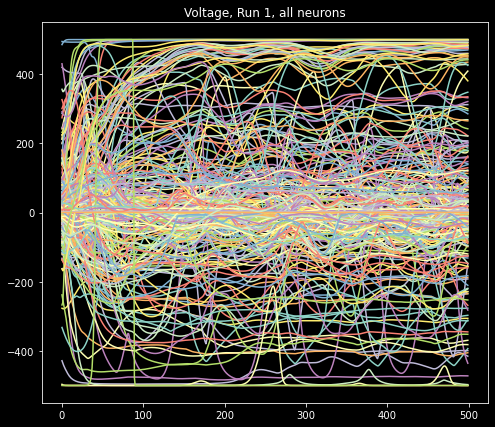

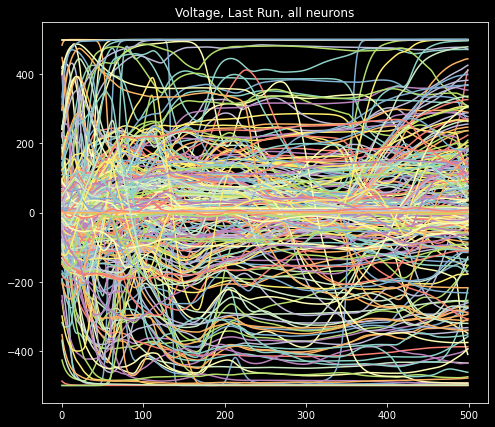

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('dark_background')
import seaborn as sns

targets = pickle.load( open( os.path.join(out_dir, 'run' + str(0), "targets.p"), "rb" ) )
pd1=pd.DataFrame(targets)
pd1.plot(figsize=(8, 7), title='Voltage, Run 1, all neurons',legend=None);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

targets = pickle.load( open( os.path.join(out_dir, 'run' + str(runs-1), "targets.p"), "rb" ) )
pd1=pd.DataFrame(targets)
pd1.plot(figsize=(8, 7), title='Voltage, Last Run, all neurons',legend=None);
plt.ticklabel_format(style='plain', axis='y')
plt.show()